## 预测泰坦尼克号乘客生还率

1912年，泰坦尼克号在第一次航行中就与冰山相撞沉没，导致了大部分乘客和船员身亡。在这个入门项目中，我们将探索部分泰坦尼克号旅客名单，来确定哪些特征可以最好地预测一个人是否会生还。为了完成这个项目，你将需要实现几个基于条件的预测并回答下面的问题。我们将根据代码的完成度和对问题的解答来对你提交的项目的进行评估。 

从泰坦尼克号的数据样本中，我们可以看到船上每位旅客的特征

- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄（可能存在 `NaN`）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（可能存在 `NaN`）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

因为我们感兴趣的是每个乘客或船员是否在事故中活了下来。可以将 **Survived** 这一特征从这个数据集移除，并且用一个单独的变量 `outcomes` 来存储。它也做为我们要预测的目标。


### 计算准确率
为了验证我们预测的结果，我们需要一个标准来给我们的预测打分。因为我们最感兴趣的是我们预测的**准确率**，既正确预测乘客存活的比例。

### 最简单的预测

如果我们要预测泰坦尼克号上的乘客是否存活，但是我们又对他们一无所知，那么最好的预测就是船上的人无一幸免。这是因为，我们可以假定当船沉没的时候大多数乘客都遇难了。下面的 `predictions_0` 函数就预测船上的乘客全部遇难。  

### 考虑一个特征进行预测

我们可以使用 `survival_stats` 函数来看看 **Sex** 这一特征对乘客的存活率有多大影响。这个函数定义在名为 `titanic_visualizations.py` 的 Python 脚本文件中，我们的项目提供了这个文件。传递给函数的前两个参数分别是泰坦尼克号的乘客数据和乘客的 生还结果。第三个参数表明我们会依据哪个特征来绘制图形。

观察泰坦尼克号上乘客存活的数据统计，我们可以发现大部分男性乘客在船沉没的时候都遇难了。相反的，大部分女性乘客都在事故中**生还**。让我们以此改进先前的预测：如果乘客是男性，那么我们就预测他们遇难；如果乘客是女性，那么我们预测他们在事故中活了下来。

### 考虑两个特征进行预测

仅仅使用乘客性别（Sex）这一特征，我们预测的准确性就有了明显的提高。现在再看一下使用额外的特征能否更进一步提升我们的预测准确度。例如，综合考虑所有在泰坦尼克号上的男性乘客：我们是否找到这些乘客中的一个子集，他们的存活概率较高。让我们再次使用 `survival_stats` 函数来看看每位男性乘客的年龄（Age）。这一次，我们将使用第四个参数来限定柱形图中只有男性乘客。

仔细观察泰坦尼克号存活的数据统计，在船沉没的时候，大部分小于10岁的男孩都活着，而大多数10岁以上的男性都随着船的沉没而**遇难**。让我们继续在先前预测的基础上构建：如果乘客是女性，那么我们就预测她们全部存活；如果乘客是男性并且小于10岁，我们也会预测他们全部存活；所有其它我们就预测他们都没有幸存。  

In [4]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [6]:
import numpy as np
import pandas as pd

# 数据可视化代码
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# 加载数据集
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# 显示数据列表中的前几项乘客数据
display(full_data.head())

#数据预处理

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# 从数据集中移除 'Survived' 这个特征，并将它存储在一个新的变量中。
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)  #可以使用drop移除read_csv中的某一项

# 显示已移除 'Survived' 特征的数据集
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
def accuracy_score(truth, pred):
    """ 返回 pred 相对于 truth 的准确率 """
    
    # 确保预测的数量与结果的数量一致
    if len(truth) == len(pred): 
        
        # 计算预测准确率（百分比）
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# 测试 'accuracy_score' 函数
predictions = pd.Series(np.ones(5, dtype = int)) #五个预测全部为1，既存活
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [22]:
def predictions_0(data):
    """ 不考虑任何特征，预测所有人都无法生还 """

    predictions = []
    for _, passenger in data.iterrows():
        
        # 预测 'passenger' 的生还率
        predictions.append(0)
    
    # 返回预测结果
    return pd.Series(predictions)

# 进行预测
predictions = predictions_0(data)
print(accuracy_score(outcomes[:], predictions))

Predictions have an accuracy of 61.62%.


In [23]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


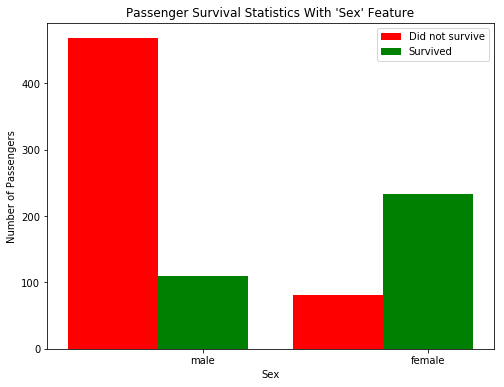

In [24]:
survival_stats(data, outcomes, 'Sex')

In [28]:
def predictions_1(data):
    """ 只考虑一个特征，如果是女性则生还 """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        
        else:
            predictions.append(0)
    
    # 返回预测结果
    return pd.Series(predictions)

# 进行预测
predictions = predictions_1(data)
print(accuracy_score(outcomes[:], predictions))

Predictions have an accuracy of 78.68%.


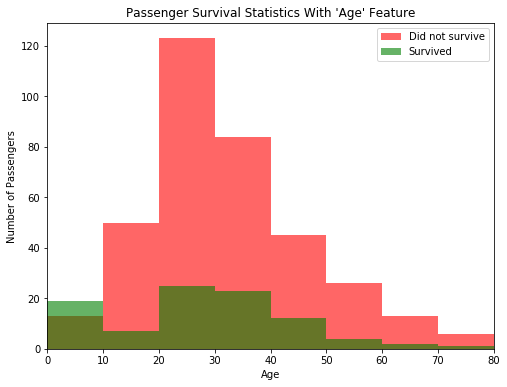

In [50]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [32]:
def predictions_2(data):
    """ 考虑两个特征: 
            - 如果是女性则生还
            - 如果是男性并且小于10岁则生还 """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    
    # 返回预测结果
    return pd.Series(predictions)

# 进行预测
predictions = predictions_2(data)
print (accuracy_score(outcomes[:], predictions))

Predictions have an accuracy of 79.35%.


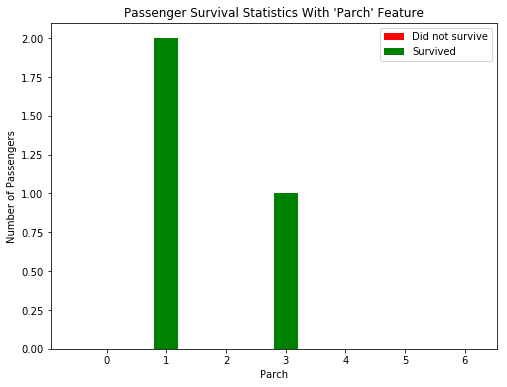

In [191]:
#survival_stats(data, outcomes, 'Fare', ["Sex == 'male'", "Pclass == 2", "Age > 17","SibSp == 0","Parch == 0", "Embarked == 'S'"])
#survival_stats(data, outcomes, 'Parch', ["Sex == 'male'", "Pclass == 1", "Age <= 20","SibSp == 1"])
#survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 1", "Age < 10"])
#survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 2", "Age < 10"])
#survival_stats(data, outcomes, 'Parch', ["Sex == 'male'", "Pclass == 3", "Age < 10","SibSp == 4"])
#survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])
#survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])
#survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])
#女性的存活和fare没有关系
#survival_stats(data, outcomes, 'Parch', ["Sex == 'female'","Pclass == 1","SibSp == 1"])
#survival_stats(data, outcomes, 'Parch', ["Sex == 'female'","Pclass == 2","SibSp == 2"])
#survival_stats(data, outcomes, 'Parch', ["Sex == 'female'","Pclass == 3","SibSp == 4"])

In [193]:
def predictions_3(data):
    """ 考虑多个特征，准确率至少达到80% """
    
    predictions = []
    for _, passenger in data.iterrows():
        #女性：从年龄开始 一层层的 pclass sibsp parch 将不明确归类的情况一层层深入
        if passenger['Sex'] == 'female':
            if passenger['Pclass'] == 3:
                if passenger['SibSp'] == 0:
                    if passenger['Parch'] <= 3:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                    
                elif passenger['SibSp'] == 1:
                    if passenger['Parch'] == 0 or passenger['Parch'] ==1 or passenger['Parch'] ==5:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                
                elif passenger['SibSp'] == 2:
                    if passenger['Parch'] <= 1:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                
                elif passenger['SibSp'] == 3:
                    if passenger['Parch'] == 0:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                else:
                    predictions.append(0)
            else:
                predictions.append(1)
        
        #男性：从年龄开始 一层层的 pclass sibsp parch 将不明确归类的情况一层层深入
        else:
            if passenger['Age'] < 10:
                if passenger['Pclass'] == 3:
                    if passenger['SibSp'] == 0 or passenger['SibSp'] == 1:
                        predictions.append(1)
                    
                    elif passenger['SibSp'] == 4:
                        if passenger['Parch'] == 2:
                            predictions.append(1)
                        else:
                            predictions.append(0)
                    
                    else:
                        predictions.append(0)
                
                else:
                    predictions.append(1)
            
            else:
                if passenger['Pclass'] == 1:
                    if passenger['Age'] <= 20:
                        if passenger['SibSp'] == 0:
                            predictions.append(1)
                        
                        elif passenger['SibSp'] == 1:
                            if passenger['Parch'] == 2:
                                predictions.append(1)
                            else:
                                predictions.append(0)
                    
                        else:
                            predictions.append(0)
                    else:
                        if passenger['Age'] <= 40:
                            predictions.append(1)
                        else:
                            predictions.append(0)
                
                elif passenger['Pclass'] == 2:
                    if passenger['Age'] <= 17:
                        if passenger['SibSp'] == 0:
                            if passenger['Parch'] == 2:
                                predictions.append(1)
                            else:
                                predictions.append(0)
                        elif passenger['SibSp'] == 1 or passenger['SibSp'] == 2:
                            predictions.append(1)
                        else:
                            if passenger['SibSp'] == 0 or passenger['SibSp'] == 1:
                                if passenger['Parch'] == 0:
                                    if passenger['Embarked'] == 'S':
                                        if passenger['Fare'] < 20:
                                            predictions.append(1)
                                        else:
                                            predictions.append(0)
                                        
                                    else:
                                        predictions.append(0)
                                else:
                                    predictions.append(0)
                            else:
                                predictions.append(0)
                    else:
                        predictions.append(0)
                
                else:
                    predictions.append(0)
                    
    # 返回预测结果
    return pd.Series(predictions)

# 进行预测
predictions = predictions_3(data)
print (accuracy_score(outcomes[:], predictions))

Predictions have an accuracy of 83.28%.
